# Short-list promising models  
Notes: 
- If the data is huge, you may want to sample smaller training sets so you can train many different models in a reasonable time (be aware that this penalizes complex models such as large neural nets or Random Forests).  
- Once again, try to automate these steps as much as possible.    

1. Train many quick and dirty models from different categories (e.g., linear, naive, Bayes, SVM, Random Forests, neural net, etc.) using standard parameters.  
2. Measure and compare their performance.  
    - For each model, use N-fold cross-validation and compute the mean and standard deviation of their performance. 
3. Analyze the most significant variables for each algorithm.  
4. Analyze the types of errors the models make.  
    - What data would a human have used to avoid these errors?  
5. Have a quick round of feature selection and engineering.  
6. Have one or two more quick iterations of the five previous steps.  
7. Short-list the top three to five most promising models, preferring models that make different types of errors.  


# Fine-Tune the System  
Notes:  
- You will want to use as much data as possible for this step, especially as you move toward the end of fine-tuning.   
- As always automate what you can.    

1. Fine-tune the hyperparameters using cross-validation.  
    - Treat your data transformation choices as hyperparameters, especially when you are not sure about them (e.g., should I replace missing values with zero or the median value? Or just drop the rows?).  
    - Unless there are very few hyperparamter values to explore, prefer random search over grid search. If training is very long, you may prefer a Bayesian optimization approach (e.g., using a Gaussian process priors, as described by Jasper Snoek, Hugo Larochelle, and Ryan Adams ([https://goo.gl/PEFfGr](https://goo.gl/PEFfGr)))  
2. Try Ensemble methods. Combining your best models will often perform better than running them invdividually.  
3. Once you are confident about your final model, measure its performance on the test set to estimate the generalization error.

> Don't tweak your model after measuring the generalization error: you would just start overfitting the test set.  


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pytz
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [3]:
X_train = pd.read_csv('../datasets/scaled_train_test/X_train_standard.csv', delimiter=',')
X_test = pd.read_csv('../datasets/scaled_train_test/X_test_standard.csv', delimiter=',')
y_train = X_train['Value (kWh)']
y_test = X_test['Value (kWh)']
X_train.drop(['Value (kWh)'], axis=1, inplace=True)
X_test.drop(['Value (kWh)'], axis=1, inplace=True)

In [4]:
# X_train = X_train[['Global radiation (W/m2)','Air temperature (degC)']]
# X_test = X_test[['Global radiation (W/m2)','Air temperature (degC)']]

# Random Forest

In [5]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
model = RandomForestRegressor(n_estimators = 5000, max_depth=10, random_state=42,n_jobs=4)

In [71]:
model.fit(X_train, y_train)
print("Fit done")

Fit done


In [72]:
y_pred = model.predict(X_test)
test = pd.DataFrame(data=y_test.values)
test.columns=['y_test']
test['y_pred'] = y_pred

In [73]:

# mse = mean_squared_error(test['y_test'], test['y_pred'])
# print("MSE - ", mse)

In [74]:
# sns.scatterplot(x='y_test', y='y_pred', data=test)

### Metrics

In [75]:
#predicting on the train set
y_pred = model.predict(X_train)
print('train mse: {}'.format(mean_squared_error(y_train, y_pred)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, y_pred))))
print('train r2: {}'.format(r2_score(y_train, y_pred)))
print()

#predicting on the test set
y_pred = model.predict(X_test)

# determine mse and rmse
print('test mse: {}'.format(mean_squared_error(y_test, y_pred)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, y_pred))))
print('test r2: {}'.format(r2_score(y_test, y_pred)))

train mse: 0.03920752805061372
train rmse: 0.19800890901829069
train r2: 0.9607924719493863

test mse: 0.06295703463919597
test rmse: 0.2509124043151234
test r2: 0.9361785470142495


### Scatter plot

Text(0.5, 1.0, 'Evaluation of Random Forest Predictions')

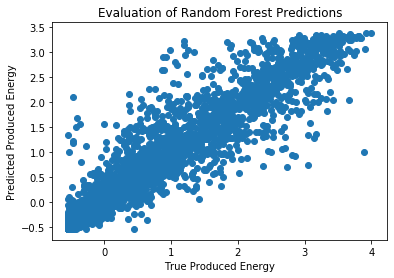

In [76]:
plt.scatter(y_test, model.predict(X_test))
plt.xlabel('True Produced Energy')
plt.ylabel('Predicted Produced Energy')
plt.title('Evaluation of Random Forest Predictions')

### Errors distribution

Text(0.5, 1.0, 'Error distribution')

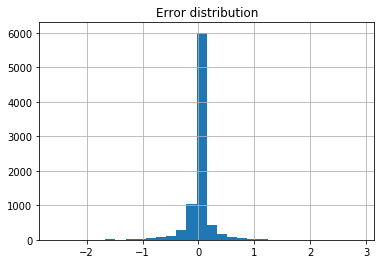

In [77]:
# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed

errors = y_test - model.predict(X_test)
errors.hist(bins=30)
plt.title('Error distribution')

### Feature importances

Feature importances:  [2.52539329e-03 4.94432685e-03 1.00790030e-02 2.77434227e-03
 2.70960546e-03 9.13316668e-01 2.34424993e-03 4.31672980e-03
 6.45468469e-05 3.71941240e-02 1.97310102e-02]


Text(0.5, 1.0, 'Feature importances')

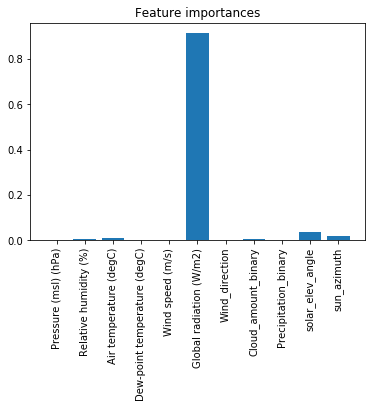

In [78]:
print("Feature importances: ", model.feature_importances_)
plt.bar(x=X_train.columns,height=model.feature_importances_);
plt.xticks(rotation='vertical');
plt.title('Feature importances')

# Hyperparameter tuning for Random Forest

In [6]:
rf = RandomForestRegressor()

In [7]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from pprint import pprint
#source code: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
# Number of trees in random forest
n_estimators = [2000,5000]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 4)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [8]:
max_depth

[10, 40, 70, 100, None]

In [9]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = 6)

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed: 20.1min
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed: 141.7min


In [ ]:
rf_random.best_params_

In [ ]:
rf_best_param = rf_random.best_params_

In [ ]:
import pickle
pickle.dump(rf_best_param, open( "rf_best_param_CV.p", "wb" ) )

In [ ]:
def evaluate(model, X_train, X_test):
    y_pred = model.predict(test_features)
    print('Model Performance')
    print('mse: {}'.format(mean_squared_error(y_test, y_pred)))
    print('rmse: {}'.format(sqrt(mean_squared_error(y_test, y_pred))))
    print('r2: {}'.format(r2_score(y_test, y_pred)))
    